### Verificação do Ambiente de GPU

In [10]:
!nvidia-smi

Wed Nov 26 00:04:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:1B:00.0 Off |                    0 |
| N/A   28C    P0             68W /  700W |       0MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!nvcc --version

try:
    import google.colab
    _ON_COLAB = True
except:
    _ON_COLAB = False

print('Running on Google Colab = ', _ON_COLAB)
import os
import torch
from IPython import get_ipython
import os
# Definir o caminho base
if _ON_COLAB:
    BASE_PATH = "/content"
    import locale
    locale.getpreferredencoding = lambda: "UTF-8"
else:
    BASE_PATH = "/lapix/compartilhado/asbestos/resnet/resnet34/" # trocar para o base path do seu computador se estiver rodando localmente, deixar /lapix se estiver rodando nos conteiners lapix
    VISIBLE_GPUS = [3] # Selecionar a GPU PARA RODAR! VER QUAL ESTA LIVRE

    if torch.cuda.device_count() != 8:
        print("GPU SETADA - PULANDO ETAPA")
    else:
        os.environ["CUDA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        os.environ["NVIDIA_VISIBLE_DEVICES"] = str(VISIBLE_GPUS).replace("]", "").replace("[","").replace(" ", "")
        print("CUDA GPUS NUMBER: ", torch.cuda.device_count())
    
os.chdir(BASE_PATH) # garantir que está executando no caminho base definido

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Mar_28_02:18:24_PDT_2024
Cuda compilation tools, release 12.4, V12.4.131
Build cuda_12.4.r12.4/compiler.34097967_0
Running on Google Colab =  False
GPU SETADA - PULANDO ETAPA


In [4]:
import warnings
warnings.filterwarnings('ignore')

### Verificação de Hardware e Importações

Verifica a disponibilidade CUDA (NVIDIA), exibe o modelo da GPU ativa 

In [5]:
import torch
print("CUDA disponível? ", torch.cuda.is_available())
print("Qtd GPUs: ", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU: ", torch.cuda.get_device_name(0))
else:
    # Apple
    print("MPS disponível (Apple Silicon)? ", getattr(torch.backends, "mps", None) and torch.backends.mps.is_available())


CUDA disponível?  True
Qtd GPUs:  1
GPU:  NVIDIA H100 80GB HBM3


### importa a biblioteca `fastai.vision`

In [7]:
from fastai.vision.all import *
print("fastai detectou GPU?:", torch.cuda.is_available())


fastai detectou GPU?: True


### Validação de Leitura de Imagens


In [12]:
from skimage import io
import os

# Caminho para a imagem
#imgPath = '/content/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'
#imgPath = r'amostra_convertidas/pleural_effusion/101354916913099012081924155376991837012_81ss65.jpg'
# imgPath = r'/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'
imgPath = r'/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'

# Verificar se o arquivo existe
if os.path.exists(imgPath):
    # Carregar a imagem com skimage
    img = io.imread(imgPath)

    tipo_dado = img.dtype  # Acessando o tipo de dado da imagem

    # Exibir as propriedades
    print(f"Shape: {img.shape}")
    print(f"Tipo de dado: {tipo_dado}")
else:
    print("O arquivo não foi encontrado. Verifique o caminho.")

Shape: (3896, 3668, 3)
Tipo de dado: uint8


In [13]:
import cv2
import os

# Caminho para a imagem
#imgPath = '/content/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'
#imgPath = r'amostra_convertidas/pleural_effusion/101354916913099012081924155376991837012_81ss65.jpg'
# imgPath = r'/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'
imgPath = r'/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'


# Verificar se o arquivo existe
if os.path.exists(imgPath):
    # Carregar a imagem com OpenCV (por padrão, em BGR)
    img = cv2.imread(imgPath)

    if img is None:
        print("Erro ao carregar a imagem com OpenCV.")
    else:
        tipo_dado = img.dtype

        print(f"Shape: {img.shape}")
        print(f"Tipo de dado: {tipo_dado}")
else:
    print("O arquivo não foi encontrado. Verifique o caminho.")

Shape: (3896, 3668, 3)
Tipo de dado: uint8


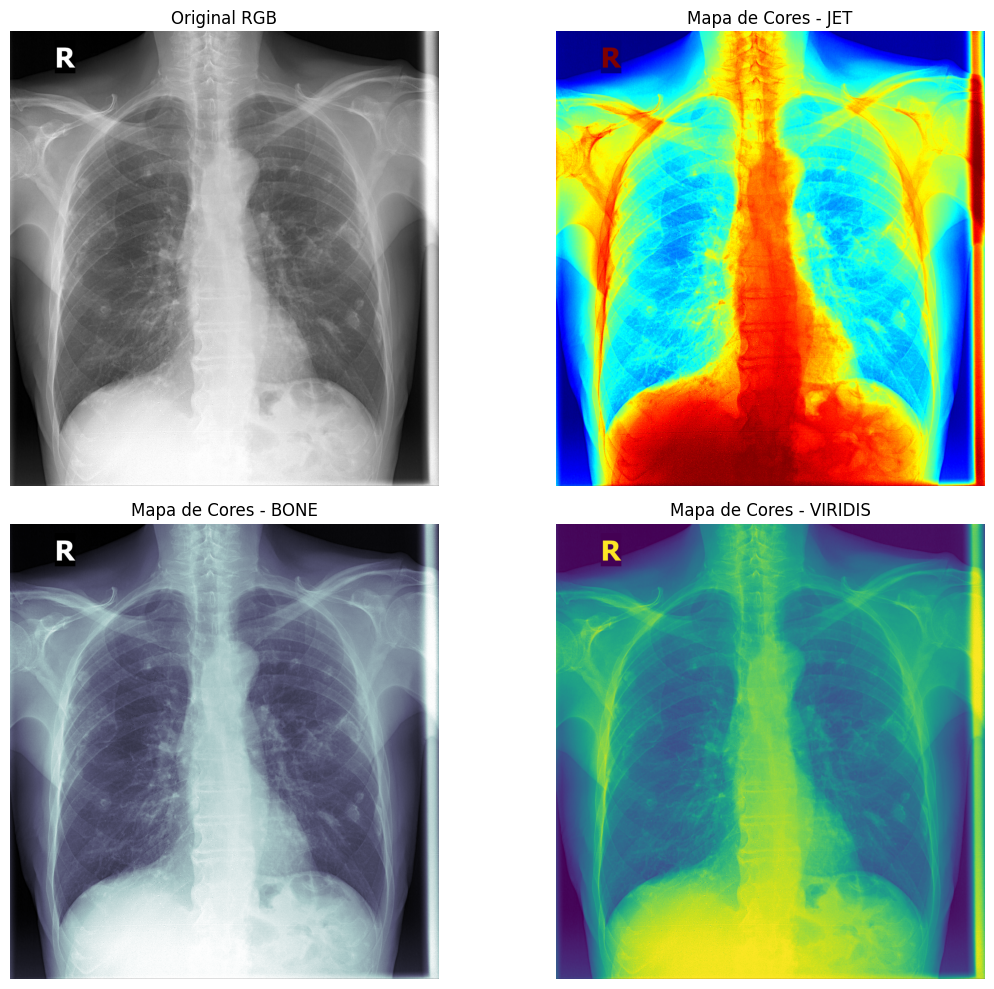

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Caminho da imagem
#imgPath = '/content/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'
#imgPath = r'amostra_convertidas/pleural_effusion/101354916913099012081924155376991837012_81ss65.jpg'
imgPath = r'/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2/labels/Asbestosis signs/158127965063113306992304369857531130990_6hpunp.jpg'


# Carrega imagem BGR e converte para RGB
orig_bgr = cv2.imread(imgPath, cv2.IMREAD_COLOR)
if orig_bgr is None:
    raise FileNotFoundError("Imagem não encontrada.")
orig_rgb = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2RGB)

# Converter para escala de cinza
gray = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2GRAY)

# Aplicar mapas de cor com OpenCV (JET e BONE)
color_jet = cv2.applyColorMap(gray, cv2.COLORMAP_JET)
color_bone = cv2.applyColorMap(gray, cv2.COLORMAP_BONE)
color_viridis = cv2.applyColorMap(gray, cv2.COLORMAP_VIRIDIS)

# Converter para RGB (BGR → RGB)
color_jet_rgb = cv2.cvtColor(color_jet, cv2.COLOR_BGR2RGB)
color_bone_rgb = cv2.cvtColor(color_bone, cv2.COLOR_BGR2RGB)
color_viridis_rgb = cv2.cvtColor(color_viridis, cv2.COLOR_BGR2RGB)

# Plotar
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax = axes.ravel()

ax[0].imshow(orig_rgb)
ax[0].set_title("Original RGB")
ax[0].axis('off')

ax[1].imshow(color_jet_rgb)
ax[1].set_title("Mapa de Cores - JET")
ax[1].axis('off')

ax[2].imshow(color_bone_rgb)
ax[2].set_title("Mapa de Cores - BONE")
ax[2].axis('off')

# Usar matplotlib para aplicar viridis
ax[3].imshow(color_viridis_rgb)
ax[3].set_title("Mapa de Cores - VIRIDIS")
ax[3].axis('off')

plt.tight_layout()
plt.show()


### Importação de Bibliotecas e Configuração de Reprodutibilidade

Importa os frameworks para manipulação de dados (`pandas`, `numpy`), aumento de dados (`albumentations`) e deep learning (`fastai`). Além disso, fixa a semente aleatória global (`81615`) para garantir o determinismo e a reprodutibilidade dos experimentos.

In [15]:
import random
from pathlib import Path

import albumentations as A
import numpy as np
import pandas as pd
from fastai.vision.all import *
#from lapixdl.evaluation.evaluate import evaluate_classification
#from lapixdl.evaluation.model import Classification

# Fix seed
random.seed(81615)

###  Integração Albumentations-FastAI

Transform do fastai que adapta um pipeline do albumentations para ser usado como data augmentation no conjunto de treino


In [16]:
class AlbumentationsTransform(Transform):
    split_idx = 0

    def __init__(self, aug):
        self.aug = aug

    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))["image"]
        return PILImage.create(aug_img)

# Não precisa ficar repetindo

In [ ]:
# import os
# import shutil

# # Diretórios de origem
# src_dirs = {
#     "Asbestosis signs": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/asbestosis_signs"
#     ],
#     "Atelectasis": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Atelectasis"
#     ],
#     "Normal": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/normal"
#     ],
#     "Pneumonia": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/pneumonia"
#     ],
#     "Effusion": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Effusion"
#     ],
#     "Fibrosis": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Fibrosis"
#     ],
# #    "Outras_Doencas": [
# #         r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Outras_Doencas"
# #    ],
#     "Pleural_Thickening": [
#          r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels/Pleural_Thickening"
#     ],}

# # Diretório base de destino (ajustado)
# dst_base =  "/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels"

# # Criar diretórios de destino
# for category in ["Asbestosis signs", "Atelectasis","Normal","Pneumonia", "Effusion", "Fibrosis", "Pleural_Thickening"]:
#     dst_dir = os.path.join(dst_base, category)
#     os.makedirs(dst_dir, exist_ok=True)

#     # Copiar arquivos das pastas de origem
#     for src in src_dirs[category]:
#         if os.path.exists(src):
#             for fname in os.listdir(src):
#                 src_path = os.path.join(src, fname)
#                 dst_path = os.path.join(dst_dir, fname)

#                 # Copiar apenas arquivos (ignora diretórios, se houver)
#                 if os.path.isfile(src_path):
#                     shutil.copy2(src_path, dst_path)

# print("✅ Cópia concluída em /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/labels")


### Definição de Caminhos e Diretórios

Configura os caminhos do sistema de arquivos para o carregamento do dataset e a persistência dos resultados do treinamento.

**Configurações:**
* **Entrada de Dados:** Define o diretório raiz (`path_dataset`) onde as imagens estão armazenadas (espera-se estrutura `train/val/test` ou por classes).
* **Saída:** Estabelece o caminho relativo `output_reduzido/models` para salvar os pesos do modelo treinado.
* **Inicialização:** Garante a criação imediata do diretório de destino (`mkdir`) para evitar erros de gravação futura.

In [17]:
path_dataset = Path(r"/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2")
path_img = path_dataset
  # Images root folder. The images must be inside the [train|val|test]/[class] folders.
path_output = Path("output_reduzido")
path_models = (
    path_output /"models"
)  # Folder where the models/weights should be saved in

path_models.mkdir(parents=True, exist_ok=True)


### Amostragem e Movimentação de Arquivos

Função auxiliar para selecionar aleatoriamente uma quantidade específica de arquivos (`nimages`) de um diretório de origem e movê-los fisicamente para um diretório de destino.


In [18]:
import shutil
import random
def random_sample_images(dirpath, destfolder, nimages):
  files_list = os.listdir(dirpath)
  for filename in random.sample(files_list, nimages):
    shutil.move(os.path.join(dirpath, filename), os.path.join(destfolder, filename))

### Divisão e Organização do Dataset (Train/Val/Test)

automação para particionar o conjunto de dados original em subconjuntos de Treinamento, Validação e Teste, garantindo a estratificação por classes.

**Parâmetros de Configuração:**
* **Divisão:** 75% Treino, 15% Validação, 10% Teste (com validação de soma total 1.0).
* **Estrutura de Entrada:** Espera diretório `labels/` contendo subpastas para cada classe.
* **Estrutura de Saída:** Gera automaticamente diretórios `train`, `val` e `test`, espelhando a hierarquia de classes original.
* **Modo de Operação:** Configurado padrão para **copiar** (`move_files = False`), preservando o dataset original (`shutil.copy2`).
* **Reprodutibilidade:** Fixa `seed=42` para garantir que o embaralhamento e a distribuição dos arquivos sejam determinísticos.

In [13]:
# import os
# import shutil
# import random
# from glob import glob
# from collections import defaultdict

# # ===== Parâmetros =====
# #BASE_PATH      = "\"
# PATH_DATASET   = os.path.join("/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido")
# PATH_LABELS    = os.path.join(PATH_DATASET, "labels")   # onde estão NORMAL/ e PNEUMONIA/ com as imagens
# PATH_TRAIN     = os.path.join(PATH_DATASET, "train")
# PATH_VAL       = os.path.join(PATH_DATASET, "val")
# PATH_TEST      = os.path.join(PATH_DATASET, "test")

# train_rate = 0.75
# val_rate   = 0.15
# test_rate  = 0.1
# assert abs(train_rate + val_rate + test_rate - 1.0) < 1e-6, "As taxas devem somar 1.0"

# seed = 42
# random.seed(seed)

# # Se True, move (tira do labels). Se False, copia.
# move_files = False

# # Extensões possíveis de imagem
# EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff"}

# def is_image(path):
#     return os.path.splitext(path)[1].lower() in EXTS

# def ensure_dirs(*paths):
#     for p in paths:
#         os.makedirs(p, exist_ok=True)

# def copy_or_move(src, dst, move=False):
#     if move:
#         shutil.move(src, dst)
#     else:
#         shutil.copy2(src, dst)

# # 1) Validar estrutura labels/
# if not os.path.isdir(PATH_LABELS):
#     raise FileNotFoundError(f"Não encontrei {PATH_LABELS}. Certifique-se de que as imagens estão em labels/NORMAL e labels/PNEUMONIA.")

# classes = [d for d in os.listdir(PATH_LABELS) if os.path.isdir(os.path.join(PATH_LABELS, d))]
# if not classes:
#     raise RuntimeError(f"Nenhuma classe encontrada dentro de {PATH_LABELS}. Esperado algo como NORMAL/ e PNEUMONIA/.")

# print("Classes detectadas:", classes)

# # 2) Criar dirs destino (espelha classes)
# for split_dir in (PATH_TRAIN, PATH_VAL, PATH_TEST):
#     ensure_dirs(split_dir)
#     for c in classes:
#         ensure_dirs(os.path.join(split_dir, c))

# # 3) Coletar imagens por classe
# images_by_class = {}
# for c in classes:
#     class_dir = os.path.join(PATH_LABELS, c)
#     # glob recursivo e filtro por extensão
#     files = [p for p in glob(os.path.join(class_dir, "**", "*"), recursive=True) if os.path.isfile(p) and is_image(p)]
#     images_by_class[c] = files

# # 4) Split e cópia/movimentação
# counts = defaultdict(lambda: {"total":0, "train":0, "val":0, "test":0})

# for c, files in images_by_class.items():
#     files = list(files)
#     random.shuffle(files)

#     n = len(files)
#     n_train = int(n * train_rate)
#     n_val   = int(n * val_rate)
#     n_test  = n - n_train - n_val

#     train_files = files[:n_train]
#     val_files   = files[n_train:n_train+n_val]
#     test_files  = files[n_train+n_val:]

#     counts[c]["total"] = n

#     # copiar/mover
#     for src in train_files:
#         dst = os.path.join(PATH_TRAIN, c, os.path.basename(src))
#         copy_or_move(src, dst, move=move_files)
#         counts[c]["train"] += 1

#     for src in val_files:
#         dst = os.path.join(PATH_VAL, c, os.path.basename(src))
#         copy_or_move(src, dst, move=move_files)
#         counts[c]["val"] += 1

#     for src in test_files:
#         dst = os.path.join(PATH_TEST, c, os.path.basename(src))
#         copy_or_move(src, dst, move=move_files)
#         counts[c]["test"] += 1

# # 5) Relatório
# print("\nResumo do split:")
# for c in classes:
#     print(f" - {c}: total={counts[c]['total']}, train={counts[c]['train']}, val={counts[c]['val']}, test={counts[c]['test']}")

# print(f"\nEstrutura pronta em: {PATH_DATASET}")
# print(f"train -> {PATH_TRAIN}\nval   -> {PATH_VAL}\ntest  -> {PATH_TEST}")


Classes detectadas: ['Pleural_Thickening', 'Pneumonia', 'Normal', 'Asbestosis signs', 'Atelectasis', 'Fibrosis', 'Effusion']

Resumo do split:
 - Pleural_Thickening: total=200, train=150, val=30, test=20
 - Pneumonia: total=200, train=150, val=30, test=20
 - Normal: total=200, train=150, val=30, test=20
 - Asbestosis signs: total=68, train=51, val=10, test=7
 - Atelectasis: total=200, train=150, val=30, test=20
 - Fibrosis: total=200, train=150, val=30, test=20
 - Effusion: total=200, train=150, val=30, test=20

Estrutura pronta em: /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido
train -> /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/train
val   -> /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/val
test  -> /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH_reduzido/test


### Configuração de Caminhos e Diretórios de Saída

Define os caminhos absolutos para leitura dos dados e relativos para o armazenamento de resultados, imprime para verificação.


In [19]:
from pathlib import Path
import os

path_dataset = Path("/lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2")
path_img = path_dataset

path_output = Path("output_reduzido")
path_models = path_output / "models"  

os.makedirs(path_models, exist_ok=True)

print("Dataset:", path_dataset)
print("Saída  :", path_output)
print("Modelos:", path_models)


Dataset: /lapix/compartilhado/asbestos/resnet/resnet_img_filtradas/Padchest_NIH/Padchest_NIH/dataset2
Saída  : output_reduzido
Modelos: output_reduzido/models


### Definição de Caminhos

Estabelece as constantes de diretório.

* **Verificação de Escopo:** Checa se as variáveis de caminho já foram inicializadas anteriormente no notebook.
* **Valores Padrão:** Caso não estejam definidas, assume caminhos locais padrão (`./dataset` e `./models`).

In [20]:
PATH_DATASET = Path(path_dataset) if 'path_dataset' in globals() else Path("./dataset")
PATH_MODELS  = Path(path_models)  if 'path_models'  in globals() else Path("./models")


## Setup (imports, seed, paths, DataLoaders, registro de modelos)

preparação do ambiente de Deep Learning

**Componentes Principais:**
* **Reprodutibilidade:** A função `set_seed(42)` fixa as sementes aleatórias de todas as bibliotecas (`numpy`, `random`, `torch`) e força o determinismo no backend CUDNN.
* **Filtragem de Classes (`ALLOWED_LABELS`):** Atua como uma *whitelist*. A função personalizada `get_items_filtered` garante que o `DataBlock` carregue apenas imagens cujas pastas pai correspondam às classes listadas, ignorando quaisquer outras classes presentes no diretório físico.
* **Pipeline de Aumento (Augmentation):** Define transformações geométricas e de pixel robustas via `albumentations` (Rotação, Brilho, Gamma, CLAHE), integradas ao FastAI através do wrapper `AlbumentationsTransform`.
* **DataBlock:** Configura a estrutura dos dados com redimensionamento para 1024px, normalização (estatísticas ImageNet) e divisão de treino/validação baseada na estrutura de pastas (`GrandparentSplitter`).
* **Conjunto de Teste:** Gera manualmente um DataLoader de teste (`test_dl`) filtrado, garantindo consistência com as classes definidas no treinamento.
* **Registro de Modelos:** Prepara o dicionário de arquiteturas (habilitando `resnet34`) e define as métricas de avaliação (Acurácia, F1, Precision, Recall).

In [21]:
# --- Imports e setup ---
import os, gc, json, time
from pathlib import Path
import numpy as np
import pandas as pd
import torch

from fastai.vision.all import *
from fastai.callback.schedule import valley, slide
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)

import albumentations as A
from torchvision.models import resnet34, resnet50, vgg16_bn, efficientnet_b0

# Reprodutibilidade
def set_seed(seed=42):
    import random
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed); torch.backends.cudnn.deterministic = True

set_seed(42)

# --- Paths (use suas variáveis já definidas, se existirem) ---
PATH_DATASET = Path(path_dataset) if 'path_dataset' in globals() else Path("./dataset")
PATH_MODELS  = Path(path_models)  if 'path_models'  in globals() else Path("./models")
PATH_MODELS.mkdir(parents=True, exist_ok=True)

# --- Device ---
DEV = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", DEV)

# ============================================================
#   DEFINA AQUI QUAIS CLASSES QUER TREINAR NESTE EXPERIMENTO
# ============================================================
# Os nomes devem ser exatamente os nomes das pastas dentro de
# PATH_DATASET/train, PATH_DATASET/val, PATH_DATASET/test
ALLOWED_LABELS = [
    "Normal",
#    "Asbestosis signs",
    "Pneumonia",
    "Atelectasis",
    "Fibrosis",
#    "Effusion",
    "Pleural_Thickening",
#    "Outras_Doencas"
]


print("Classes incluídas neste experimento:", ALLOWED_LABELS)

# --- Augmentations e DataLoaders ---
augmentations = A.Compose([
    A.HorizontalFlip(p=0.0),
    A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.05, rotate_limit=7, p=0.7),
    A.RandomBrightnessContrast(0.08, 0.08, p=0.6),
    A.RandomGamma(gamma_limit=(90,110), p=0.4),
    A.CLAHE(clip_limit=2.0, tile_grid_size=(8,8), p=0.2),
], p=1.0)

batch_tfms = [
    AlbumentationsTransform(augmentations),
    Normalize.from_stats(*imagenet_stats)
]

metrics = [accuracy, F1Score(average="macro"), Precision(average="macro"), Recall(average="macro")]

bs = 16

# ---------- FILTRO DE CLASSES (train/val) VIA DATABLOCK ----------
def get_items_filtered(path: Path):
    """
    Retorna apenas imagens das pastas 'train' e 'val'
    cujas labels (nome da pasta) estão em ALLOWED_LABELS.
    """
    all_files = get_image_files(path)
    return [
        f for f in all_files
        if f.parent.parent.name in ["train", "val"]   # garante só train/val
        and f.parent.name in ALLOWED_LABELS          # filtra classes
    ]

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_items_filtered,
    splitter=GrandparentSplitter(train_name="train", valid_name="val"),
    get_y=parent_label,
    item_tfms=Resize(1024),
    batch_tfms=batch_tfms,
)

# Mantém o mesmo nome 'data' que você usava antes
data = dblock.dataloaders(PATH_DATASET, bs=bs, device=DEV)

print("Vocab (classes que o modelo enxerga):", data.vocab)

# ---------- TEST SET FILTRADO NAS MESMAS CLASSES ----------
test_root = PATH_DATASET / "test"
test_files = [
    f for f in get_image_files(test_root)
    if f.parent.name in ALLOWED_LABELS
]

test_dl = data.test_dl(test_files, with_labels=True)

# --- Registro de modelos ---
MODEL_REGISTRY = {
    "resnet34": resnet34,
#    "resnet50": resnet50,
#    "vgg16_bn": vgg16_bn,
#    "efficientnet_b0": efficientnet_b0,
}
MONITOR_METRIC = "f1_score"
MASTER_CSV     = PATH_MODELS / "experimentos_grid_vision.csv"


Device: cuda
Classes incluídas neste experimento: ['Normal', 'Pneumonia', 'Atelectasis', 'Fibrosis', 'Pleural_Thickening']
Vocab (classes que o modelo enxerga): ['Atelectasis', 'Fibrosis', 'Normal', 'Pleural_Thickening', 'Pneumonia']


## Helpers (learner, lr_find seguro, treinar fase, avaliação no /test, util CSV)

Conjunto de funções para instanciar o modelo, otimizar hiperparâmetros, executar o ciclo de treinamento e consolidar métricas de teste.

**Componentes:**

* **`get_learner`**: Fábrica de objetos `vision_learner`. Configura automaticamente a precisão mista (FP16) se GPU estiver disponível, define a função de perda (`CrossEntropyLossFlat`) e anexa as métricas de monitoramento.
* **`safe_lr_find`**: Wrapper robusto para o `lr_find` do FastAI. Tenta identificar a taxa de aprendizado ideal usando os métodos `valley` ou `slide`. Inclui tratamento de exceção para retornar um valor padrão (`1e-3`) em caso de falha de convergência.
* **`train_phase`**: Gerencia o ciclo de treinamento (`fit_one_cycle`).
    * Suporta fases de Transfer Learning (camadas congeladas) e Fine-tuning (descongeladas).
    * Gerencia o carregamento de checkpoints anteriores (`base_ckpt`).
    * Implementa `SaveModelCallback` para salvar apenas o melhor modelo baseado na métrica monitorada.
    * Executa limpeza de memória (Garbage Collection e `cuda.empty_cache`) após o ciclo.
* **`evaluate_on_test`**: Pipeline de inferência no conjunto de teste.
    * Aplica o mesmo filtro de classes (`allowed_labels`) usado no treino para garantir consistência.
    * Calcula métricas detalhadas via Scikit-Learn: Acurácia, Precisão, Recall, F1-Score (Macro) e ROC-AUC (One-vs-Rest).
    * Gera um relatório de classificação textual (`classification_report`).
* **`append_results_csv`**: Adiciona as métricas do experimento atual a um arquivo CSV cumulativo (`experimentos_grid_vision.csv`), criando-o se não existir.

In [22]:
def get_learner(dls, arch_fn, pretrained=True, unfreeze=False):
    learn = vision_learner(
        dls, arch_fn, pretrained=pretrained,
        metrics=metrics, loss_func=CrossEntropyLossFlat()
    )
    learn.to(DEV)
    if DEV.type == 'cuda': learn = learn.to_fp16()
    if unfreeze: learn.unfreeze()
    learn.path = PATH_MODELS
    return learn

def safe_lr_find(learn, num_it=None, start_lr=1e-7, end_lr=1e-1):
    if num_it is None: num_it = min(60, len(learn.dls.train))
    try:
        sugg = learn.lr_find(start_lr=start_lr, end_lr=end_lr, num_it=num_it, stop_div=False,
                             suggest_funcs=(valley, slide))
        lr = getattr(sugg, 'valley', None)
        return float(lr) if lr is not None else 1e-3
    except Exception as e:
        print("lr_find falhou:", repr(e)); return 1e-3

def train_phase(model_name, arch_fn, dls, phase, base_ckpt, epochs, wd=1e-3, lr=None):
    assert phase in ("transfer","finetune")
    unfreeze_flag = (phase == "finetune")
    learn = get_learner(dls, arch_fn, pretrained=True, unfreeze=unfreeze_flag)

    if base_ckpt:
        try:
            learn.load(base_ckpt); print(f"[{model_name}:{phase}] carregado: {base_ckpt}")
        except Exception as e:
            print(f"[{model_name}:{phase}] não carregou {base_ckpt}: {e}")

    if phase == "finetune" and DEV.type == 'cuda':
        learn.to_fp32(); learn.unfreeze()

    if lr is None: lr = safe_lr_find(learn)

    ckpt_name = f"{model_name}_{phase}"
    cbs = [SaveModelCallback(monitor=MONITOR_METRIC, fname=ckpt_name, with_opt=True)]
    print(f"[{model_name}:{phase}] epochs={epochs}, lr_max={lr}, wd={wd}")
    with learn.no_bar():
        learn.fit_one_cycle(epochs, lr_max=lr, wd=wd, cbs=cbs)

    # histórico por época
    hist = []
    names = learn.recorder.metric_names
    for row in learn.recorder.values:
        rec = dict(zip(names[1:-1], row))
        hist.append(rec)

    del learn; gc.collect()
    if torch.cuda.is_available(): torch.cuda.empty_cache()
    return ckpt_name, hist

def evaluate_on_test(dls, ckpt_name, arch_fn, model_name, phase, allowed_labels=None):
    learn = get_learner(dls, arch_fn, pretrained=True, unfreeze=False)
    learn.load(ckpt_name)

    test_root = PATH_DATASET / "test"

    # === FILTRO DE CLASSES TAMBÉM NO TEST ===
    if allowed_labels is not None:
        test_files = [
            f for f in get_image_files(test_root)
            if f.parent.name in allowed_labels
        ]
    else:
        test_files = get_image_files(test_root)

    assert len(test_files) > 0, f"Nenhuma imagem em {test_root} depois do filtro."

    test_dl = dls.test_dl(test_files, with_labels=True)
    preds, targs = learn.get_preds(dl=test_dl)
    y_true = targs.cpu().numpy()
    y_pred = preds.argmax(dim=1).cpu().numpy()

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1   = f1_score(y_true, y_pred, average="macro")

    try:
        n_classes = preds.shape[1]
        y_true_ovr = np.eye(n_classes)[y_true]
        roc_auc_macro = roc_auc_score(
            y_true_ovr, preds.cpu().numpy(),
            average='macro', multi_class='ovr'
        )
    except Exception:
        roc_auc_macro = np.nan

    clf_rep = classification_report(
        y_true, y_pred,
        target_names=list(map(str, (getattr(dls, 'vocab', None) or getattr(dls.train, 'vocab', [])))),
        zero_division=0
    )

    del learn; gc.collect()
    if torch.cuda.is_available(): torch.cuda.empty_cache()

    return {
        "model": model_name, "phase": phase, "ckpt": ckpt_name,
            "test_accuracy": acc, "test_precision_macro": prec,
            "test_recall_macro": rec, "test_f1_macro": f1,
            "test_roc_auc_macro": roc_auc_macro, "classification_report": clf_rep
    }


def append_results_csv(rows, csv_path: Path):
    df = pd.DataFrame(rows)
    if csv_path.exists():
        df_old = pd.read_csv(csv_path)
        df = pd.concat([df_old, df], ignore_index=True)
    df.to_csv(csv_path, index=False)
    print("Resultados adicionados em:", csv_path)


## Estágio 1: Transfer (todos os modelos) → Ranking


Itera sobre as arquiteturas registradas para realizar o treinamento inicial com os pesos da backbone congelados (*frozen*).

**Fluxo de Execução:**
* **Ciclo de Treinamento:** Executa 75 épocas (`EPOCHS_TRANSFER`) para cada modelo, utilizando decaimento de peso (`wd=1e-3`) para regularização.
* **Registro de Métricas:** Coleta logs de desempenho de cada época e executa uma avaliação final no conjunto de teste (`evaluate_on_test`) usando o melhor checkpoint salvo.
* **Ranking:** Salva todos os dados no CSV exibe um DataFrame comparativo, ordenando os modelos pela métrica **F1-Score Macro** para identificar a melhor arquitetura nesta fase.


### TRANSFER — resnet34 ###


[resnet34:transfer] epochs=75, lr_max=0.0015848932089284062, wd=0.001
[0, 1.7846331596374512, 1.1229363679885864, 0.5750921964645386, 0.4316335203819441, 0.421333927199497, 0.4727039967338268, '01:50']
Better model found at epoch 0 with f1_score value: 0.4316335203819441.
[1, 1.3715739250183105, 0.8586295247077942, 0.6694185733795166, 0.47896273237444154, 0.49093288837599164, 0.47392477529017396, '01:52']
Better model found at epoch 1 with f1_score value: 0.47896273237444154.
[2, 1.1919852495193481, 0.771145761013031, 0.7027928829193115, 0.5043016108680242, 0.55103001552817, 0.4803253892720033, '01:57']
Better model found at epoch 2 with f1_score value: 0.5043016108680242.
[3, 1.0666521787643433, 0.7240407466888428, 0.7200070023536682, 0.5314786217218297, 0.5951736962481565, 0.5056963468706752, '01:50']
Better model found at epoch 3 with f1_score value: 0.5314786217218297.
[4, 0.9752432703971863, 0.70250004529953, 0.7187774181365967, 0.5221506921575487, 0.615957508796412, 0.49205727529

Resultados adicionados em: /lapix/compartilhado/asbestos/resnet/resnet34/output_reduzido/models/models/experimentos_grid_vision.csv


model     phase  test_accuracy  test_precision_macro  test_recall_macro  \
0  resnet34  transfer       0.969231              0.962225           0.946094   

   test_f1_macro  test_roc_auc_macro               ckpt  
0       0.953827            0.992534  resnet34_transfer

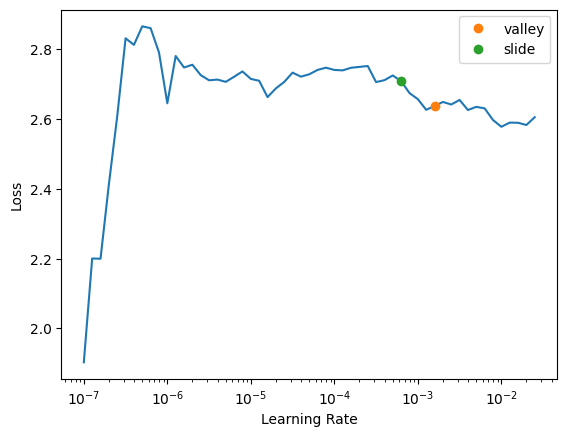

In [20]:
EPOCHS_TRANSFER = 75
WD_TRANSFER     = 1e-3
FIXED_LR_TRANSFER = None   # ex.: 1e-3 se quiser fixar

rows_stage1 = []

for model_name, arch_fn in MODEL_REGISTRY.items():
    print("\n" + "="*80)
    print(f"### TRANSFER — {model_name} ###")
    print("="*80)

    ckpt_transfer, hist = train_phase(
        model_name=model_name, arch_fn=arch_fn, dls=data,
        phase="transfer", base_ckpt=None,
        epochs=EPOCHS_TRANSFER, wd=WD_TRANSFER, lr=FIXED_LR_TRANSFER
    )

    # salvar histórico por época
    for epoch_idx, rec in enumerate(hist):
        rows_stage1.append({"model": model_name, "phase": "transfer", "epoch": epoch_idx, **rec})

    # avaliação no /test
    # avaliação no /test
    test_row = evaluate_on_test(
    data,
    ckpt_transfer,
    arch_fn,
    model_name,
    "transfer",
    allowed_labels=ALLOWED_LABELS,   # <<< passa a mesma lista usada no treino
    )
    rows_stage1.append({"model": model_name, "phase": "transfer", "epoch": "best_on_test", **{k:v for k,v in test_row.items() if k not in ("model","phase")}})

append_results_csv(rows_stage1, MASTER_CSV)

# Ranking por F1 (teste)
df_master = pd.read_csv(MASTER_CSV)
rank_transfer = (
    df_master[(df_master['phase']=="transfer") & (df_master['epoch'].astype(str)=="best_on_test")]
    .sort_values("test_f1_macro", ascending=False)
    [["model","phase","test_accuracy","test_precision_macro","test_recall_macro","test_f1_macro","test_roc_auc_macro","ckpt"]]
    .reset_index(drop=True)
)
rank_transfer


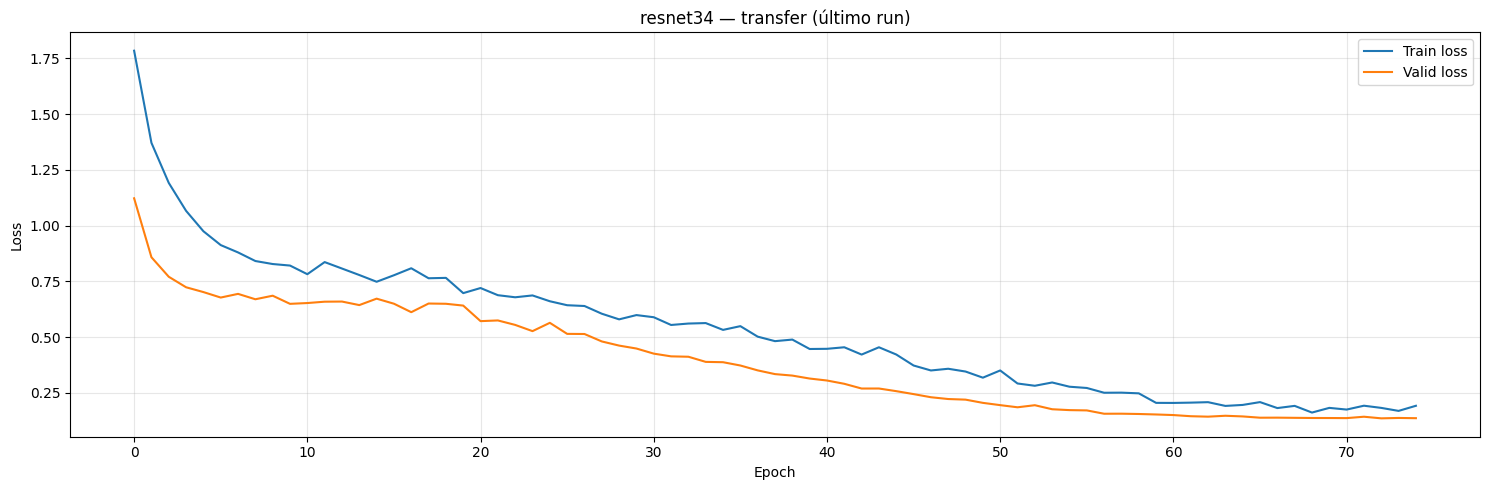

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Caminho do CSV com os históricos
CSV_PATH = Path("/lapix/compartilhado/asbestos/resnet/resnet34/output_reduzido/models/models/experimentos_grid_vision.csv")

# Nome do modelo que você quer plotar
MODEL_NAME = "resnet34"


def get_last_run_for_phase(df: pd.DataFrame, model_name: str, phase: str) -> pd.DataFrame:
    """
    Filtra o DataFrame para um dado modelo + phase e retorna
    APENAS o último run (caso existam múltiplos runs em que o epoch volta a 0).
    """
    # Filtra por modelo e phase
    df_phase = df[(df["model"] == model_name) & (df["phase"] == phase)].copy()

    # Remove linhas tipo "best_on_test" (epoch vazio)
    df_phase = df_phase[pd.to_numeric(df_phase["epoch"], errors="coerce").notna()].copy()
    df_phase["epoch"] = df_phase["epoch"].astype(int)

    # Ordena na ordem em que foi salvo (assumindo que o CSV está cronológico)
    df_phase = df_phase.sort_index()

    # Detecta "runs" pela volta do epoch (ex.: ... 58, 59, 60, 0, 1, 2, ...)
    run_ids = []
    current_run = 0
    prev_epoch = -1

    for ep in df_phase["epoch"]:
        if ep < prev_epoch:
            current_run += 1  # começou um novo run
        run_ids.append(current_run)
        prev_epoch = ep

    df_phase["run_id"] = run_ids

    # Pega APENAS o último run
    last_run_id = df_phase["run_id"].max()
    df_last = df_phase[df_phase["run_id"] == last_run_id].copy()

    return df_last


def plot_loss_curves(df: pd.DataFrame, model_name: str, phase: str):
    """
    Plota curvas de train_loss e valid_loss ao longo dos epochs
    para um modelo e phase específicos (transfer ou finetune).
    Sempre usa o último run encontrado.
    """
    df_last = get_last_run_for_phase(df, model_name, phase)

    if df_last.empty:
        print(f"Nenhum dado encontrado para model='{model_name}', phase='{phase}'.")
        return

    # Ordena por epoch só pra garantir
    df_last = df_last.sort_values("epoch")

    epochs = df_last["epoch"].values
    train_loss = df_last["train_loss"].values
    valid_loss = df_last["valid_loss"].values

    plt.figure(figsize=(15, 5))
    plt.plot(epochs, train_loss, label="Train loss")
    plt.plot(epochs, valid_loss, label="Valid loss")

    plt.title(f"{model_name} — {phase} (último run)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Lê o CSV uma vez
df_hist = pd.read_csv(CSV_PATH)

# 1) Gráfico para TRANSFER LEARNING
plot_loss_curves(df_hist, MODEL_NAME, phase="transfer")


## Estágio 2: Fine-tuning apenas nos Top-K do transfer

Seleciona os `TOP_K` melhores modelos (baseado no ranking anterior) para realizar o refinamento completo dos pesos da rede.

* **Inicialização:** Carrega os pesos do melhor checkpoint da fase de Transfer Learning (`base_ckpt`) para preservar o aprendizado prévio.
* **Descongelamento (Unfreeze):** Libera a atualização de gradientes de *todas* as camadas da arquitetura (backbone e head), permitindo que a rede inteira se especialize nas particularidades do dataset por mais 50 épocas.
* **Avaliação:** Executa a inferência final no conjunto de teste, os resultados no CSV e exibe o dataframe `final_rank`, comparando o desempenho global de todas as fases (Transfer vs. Fine-Tuning).

Selecionados para fine-tuning:


model     phase  test_accuracy  test_precision_macro  test_recall_macro  \
0  resnet34  transfer       0.969231              0.962225           0.946094   

   test_f1_macro  test_roc_auc_macro               ckpt  
0       0.953827            0.992534  resnet34_transfer


----------------------------------------------------------------------
### FINE-TUNING — resnet34 (a partir de resnet34_transfer) ###
----------------------------------------------------------------------
[resnet34:finetune] carregado: resnet34_transfer


[resnet34:finetune] epochs=50, lr_max=2.511886486900039e-05, wd=0.001
[0, 0.21114762127399445, 0.1399230808019638, 0.9725979566574097, 0.9606441049705952, 0.9651709533039015, 0.9566155579958895, '02:41']
Better model found at epoch 0 with f1_score value: 0.9606441049705952.
[1, 0.22868578135967255, 0.13712310791015625, 0.9711927175521851, 0.9592700973057313, 0.9638950221269603, 0.9549565211396569, '02:41']
[2, 0.18879370391368866, 0.1442420780658722, 0.9694361686706543, 0.9567514087709948, 0.9637589207339803, 0.9503359983826017, '02:44']
[3, 0.2170354574918747, 0.13863615691661835, 0.968733549118042, 0.9560603139428803, 0.9616189751957951, 0.950695053375809, '02:48']
[4, 0.2422972321510315, 0.15571163594722748, 0.9648691415786743, 0.9505977286284335, 0.9548072880062266, 0.9469086109961038, '02:46']
[5, 0.31021276116371155, 0.17615613341331482, 0.9536272883415222, 0.9322535029198677, 0.9253603917579932, 0.9405588155739671, '02:44']
[6, 0.3319495618343353, 0.19511818885803223, 0.94519585

Resultados adicionados em: /lapix/compartilhado/asbestos/resnet/resnet34/output_reduzido/models/models/experimentos_grid_vision.csv


model     phase  test_accuracy  test_precision_macro  test_recall_macro  \
0  resnet34  finetune       0.971263              0.962830           0.947732   
1  resnet34  transfer       0.969231              0.962225           0.946094   

   test_f1_macro  test_roc_auc_macro               ckpt  
0       0.955016            0.994478  resnet34_finetune  
1       0.953827            0.992534  resnet34_transfer

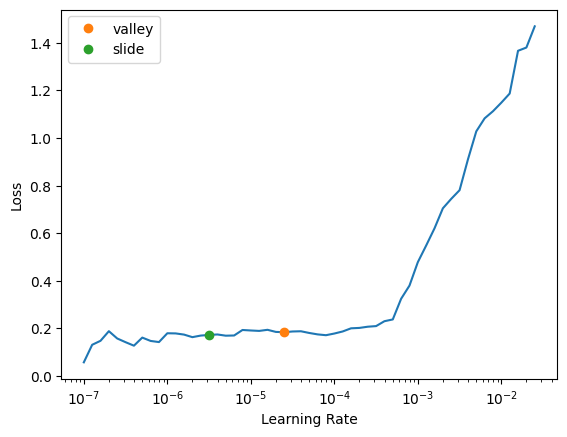

In [21]:
TOP_K = 1

EPOCHS_FINETUNE = 50
WD_FINETUNE     = 1e-3
FIXED_LR_FINETUNE = None     # ex.: slice(1e-5, 1e-4) para LR diferencial

rows_stage2 = []

topK = rank_transfer.head(TOP_K)
print("Selecionados para fine-tuning:")
display(topK)

for i, row in topK.iterrows():
    model_name = row["model"]
    arch_fn    = MODEL_REGISTRY[model_name]
    base_ckpt  = row["ckpt"]    # melhor do transfer

    print("\n" + "-"*70)
    print(f"### FINE-TUNING — {model_name} (a partir de {base_ckpt}) ###")
    print("-"*70)

    ckpt_finetune, hist = train_phase(
        model_name=model_name, arch_fn=arch_fn, dls=data,
        phase="finetune", base_ckpt=base_ckpt,
        epochs=EPOCHS_FINETUNE, wd=WD_FINETUNE, lr=FIXED_LR_FINETUNE
    )

    # histórico por época
    for epoch_idx, rec in enumerate(hist):
        rows_stage2.append({"model": model_name, "phase": "finetune", "epoch": epoch_idx, **rec})

    # avaliação no /test
    test_row = evaluate_on_test(data, ckpt_finetune, arch_fn, model_name, "finetune", allowed_labels=ALLOWED_LABELS)
    rows_stage2.append({"model": model_name, "phase": "finetune", "epoch": "best_on_test", **{k:v for k,v in test_row.items() if k not in ("model","phase")}})

append_results_csv(rows_stage2, MASTER_CSV)

# Ranking final (considera apenas linhas best_on_test)
df_master = pd.read_csv(MASTER_CSV)
final_rank = (
    df_master[df_master['epoch'].astype(str)=="best_on_test"]
    .sort_values("test_f1_macro", ascending=False)
    [["model","phase","test_accuracy","test_precision_macro","test_recall_macro","test_f1_macro","test_roc_auc_macro","ckpt"]]
    .reset_index(drop=True)
)
final_rank


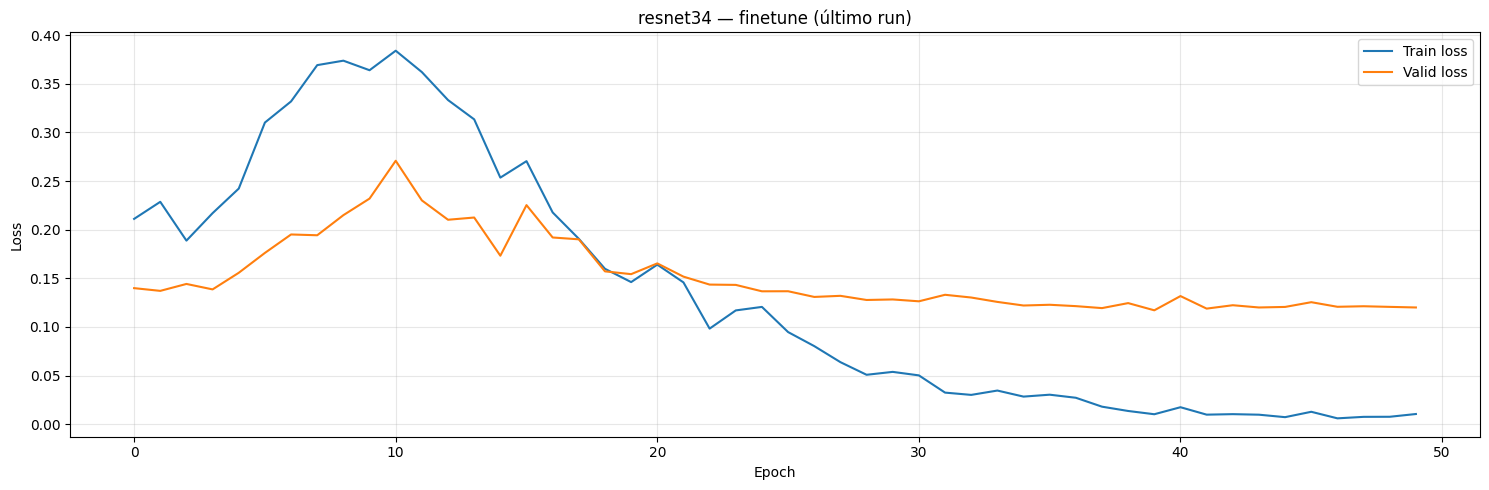

In [31]:
# 2) Gráfico para FINETUNE
plot_loss_curves(df_hist, MODEL_NAME, phase="finetune")

## (Opcional) Matriz de confusão + show_results do campeão geral

Identifica a arquitetura com melhor desempenho no ranking final, recarrega seus pesos e realiza uma avaliação visual detalhada no conjunto de teste filtrado.

* **Restauração do Estado:** Instancia um novo `learner` com a arquitetura vencedora e carrega o checkpoint correspondente (`BEST_CKPT`).
* **Consistência de Dados:** Filtra o diretório de teste para incluir apenas as classes definidas em `ALLOWED_LABELS`, garantindo que o modelo seja avaliado apenas nas classes que foi treinado (prevenindo erros de dimensão na saída).
* **Matriz de Confusão:** Gera e plota uma matriz usando `matplotlib` e `sklearn`, permitindo a visualização granular dos acertos e erros (confusões) entre classes.
* **Inspeção Visual:** Exibe uma amostra qualitativa das predições (`show_results`) para verificação manual de casos de sucesso e falha.

Melhor modelo: resnet34 | Fase: finetune | Checkpoint: resnet34_finetune
Classes presentes no /test depois do filtro: ['Atelectasis', 'Fibrosis', 'Normal', 'Pleural_Thickening', 'Pneumonia']
Vocab dos dls: ['Atelectasis', 'Fibrosis', 'Normal', 'Pleural_Thickening', 'Pneumonia']


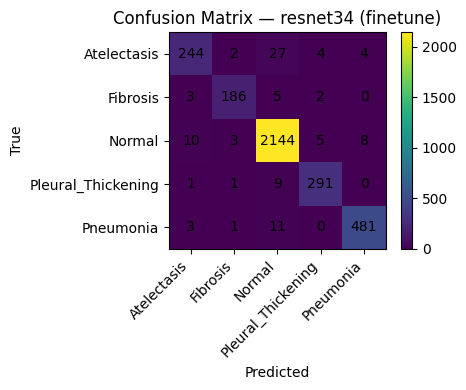

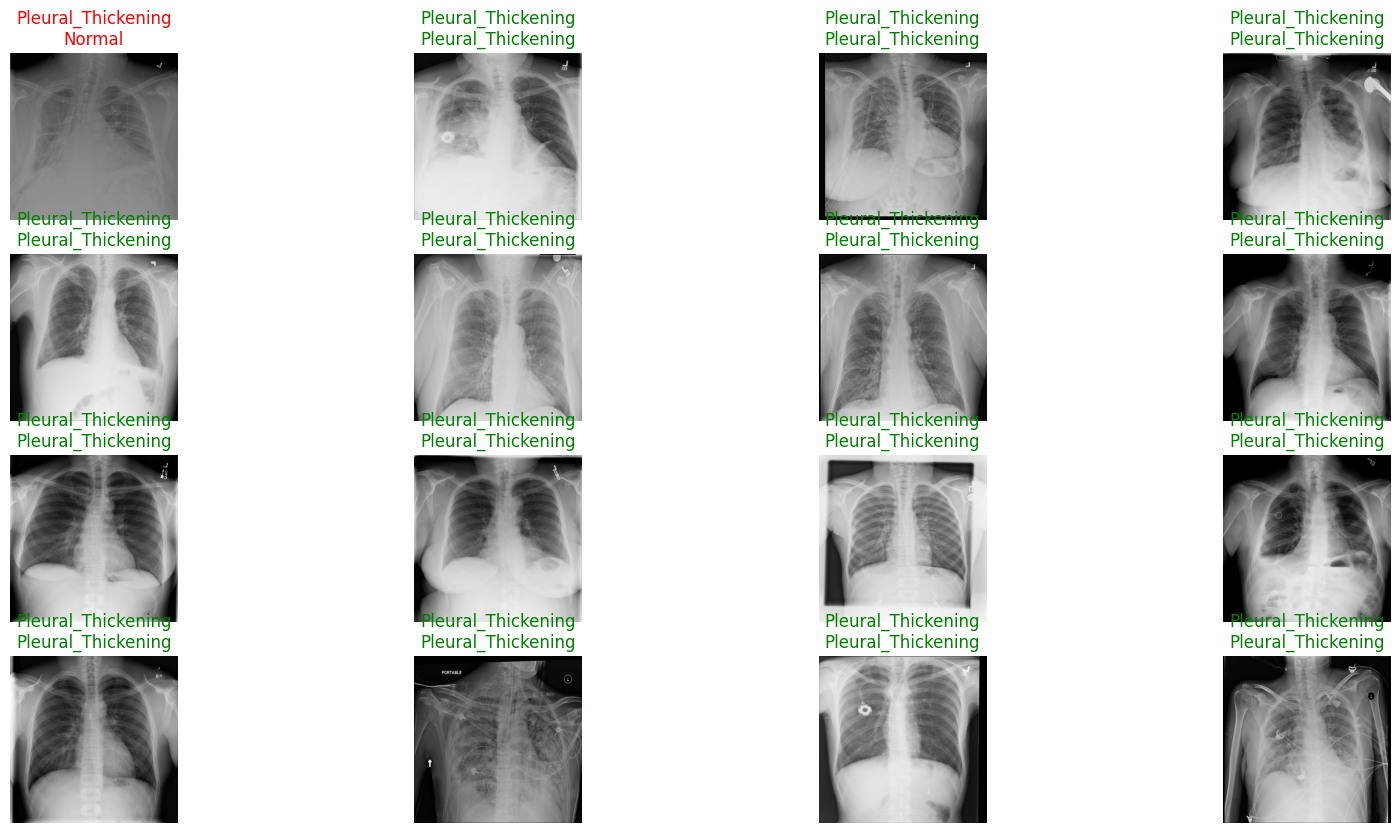

In [22]:
# ============================================================
#   MATRIZ DE CONFUSÃO E EXEMPLOS NO /test (FILTRADO)
# ============================================================

# Seleciona o melhor modelo a partir do ranking
BEST_MODEL = final_rank.iloc[0]["model"]
BEST_PHASE = final_rank.iloc[0]["phase"]
BEST_CKPT  = final_rank.iloc[0]["ckpt"]
BEST_ARCH  = MODEL_REGISTRY[BEST_MODEL]

print(f"Melhor modelo: {BEST_MODEL} | Fase: {BEST_PHASE} | Checkpoint: {BEST_CKPT}")

# Reconstrói o learner com os mesmos dls
learn = get_learner(data, BEST_ARCH, pretrained=True, unfreeze=False)
learn.load(BEST_CKPT)

# --------- Test set FILTRADO pelas mesmas classes ---------
test_root = PATH_DATASET / "test"

test_files = [
    f for f in get_image_files(test_root)
    if f.parent.name in ALLOWED_LABELS   # usa a lista já definida antes
]

# Sanidade: quais classes realmente aparecem no test depois do filtro?
test_labels_presentes = sorted({f.parent.name for f in test_files})
print("Classes presentes no /test depois do filtro:", test_labels_presentes)
print("Vocab dos dls:", list(map(str, (getattr(data, 'vocab', None) or getattr(data.train, 'vocab', [])))))

assert len(test_files) > 0, "Nenhuma imagem encontrada no /test após aplicar o filtro de classes!"

# Cria DataLoader de teste filtrado
test_dl = data.test_dl(test_files, with_labels=True)

# Predições
preds, targs = learn.get_preds(dl=test_dl)
y_true = targs.cpu().numpy()
y_pred = preds.argmax(dim=1).cpu().numpy()

# --------- Matriz de confusão ---------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title(f"Confusion Matrix — {BEST_MODEL} ({BEST_PHASE})")

vocab = list(map(str, (getattr(data, 'vocab', None) or getattr(data.train, 'vocab', []))))
ax.set_xticks(range(len(vocab))); ax.set_xticklabels(vocab, rotation=45, ha='right')
ax.set_yticks(range(len(vocab))); ax.set_yticklabels(vocab)

for (i, j), v in np.ndenumerate(cm):
    ax.text(j, i, str(v), ha='center', va='center')

plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

# --------- Exemplos do /test filtrado ---------
learn.show_results(dl=test_dl, max_n=16, figsize=(20,10))


## Avaliação de todos os modelos e fases (transfer + finetune)

Executa testes em todos os modelos listados no ranking selecionado (`models_to_check`), gerando relatórios de métricas e visualizações de desempenho individual.

* **Iteração Automática:** Percorre cada modelo/checkpoint do ranking (Transfer Learning ou Final).
* **Teste:** Recria o DataLoader de teste aplicando estritamente o filtro `ALLOWED_LABELS` para garantir que a avaliação ocorra no mesmo subconjunto de classes do treinamento, evitando erros de dimensão.
* **Métricas:** Calcula e exibe Acurácia, F1-Score, Precisão, Recall e o relatório textual completo (`classification_report`).
* **Visual:** Plota a Matriz de Confusão (heatmap) e exibe exemplos qualitativos (`show_results`) para cada checkpoint.
* **Gerenciamento de Recursos:** Executa limpeza explícita de memória (RAM e VRAM) após cada iteração para evitar vazamento de recursos ou erros de *Out Of Memory* (OOM).


🔹 Avaliando modelo: RESNET34 | Fase: finetune | Checkpoint: resnet34_finetune


Accuracy: 0.9713 | Precision: 0.9628 | Recall: 0.9477 | F1: 0.9550

📊 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.93      0.87      0.90       281
          Fibrosis       0.96      0.95      0.96       196
            Normal       0.98      0.99      0.98      2170
Pleural_Thickening       0.96      0.96      0.96       302
         Pneumonia       0.98      0.97      0.97       496

          accuracy                           0.97      3445
         macro avg       0.96      0.95      0.96      3445
      weighted avg       0.97      0.97      0.97      3445



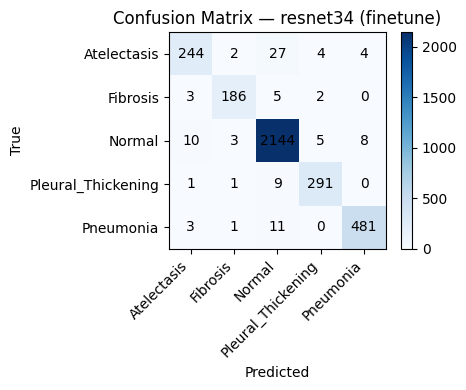

🖼️ Exemplos de predição (test filtrado):


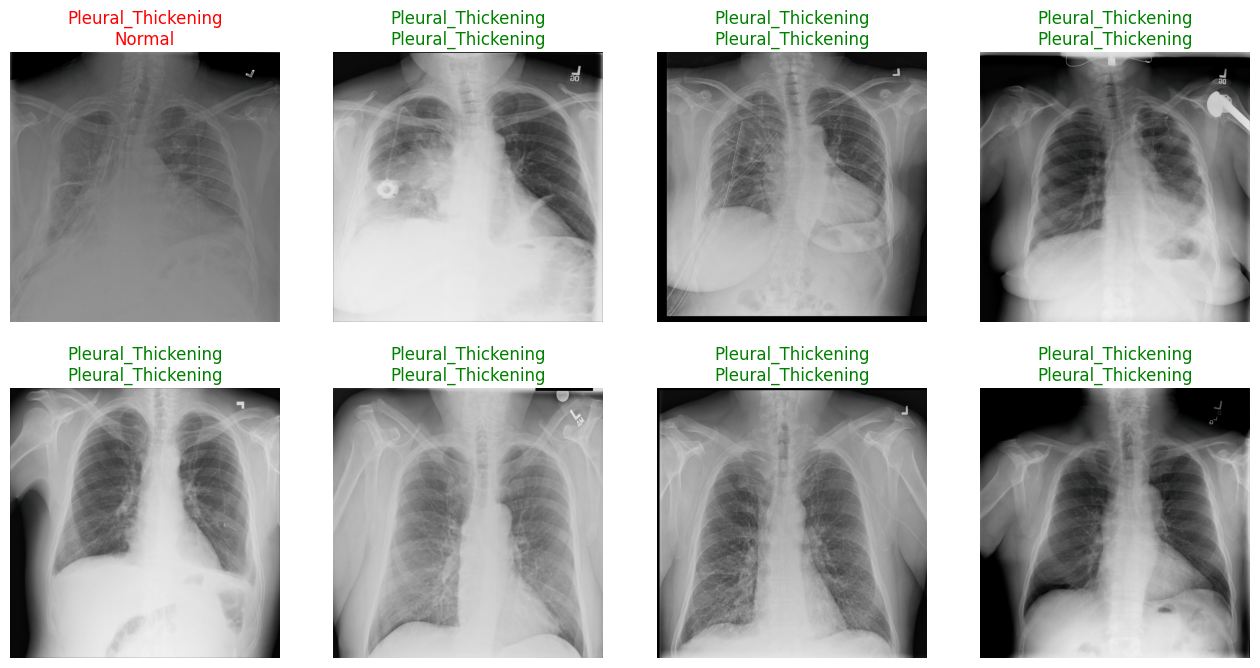


🔹 Avaliando modelo: RESNET34 | Fase: transfer | Checkpoint: resnet34_transfer


Accuracy: 0.9692 | Precision: 0.9622 | Recall: 0.9461 | F1: 0.9538

📊 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.94      0.86      0.90       281
          Fibrosis       0.97      0.96      0.96       196
            Normal       0.97      0.99      0.98      2170
Pleural_Thickening       0.96      0.97      0.96       302
         Pneumonia       0.97      0.95      0.96       496

          accuracy                           0.97      3445
         macro avg       0.96      0.95      0.95      3445
      weighted avg       0.97      0.97      0.97      3445



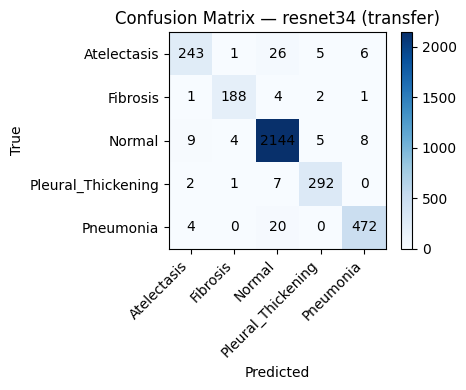

🖼️ Exemplos de predição (test filtrado):


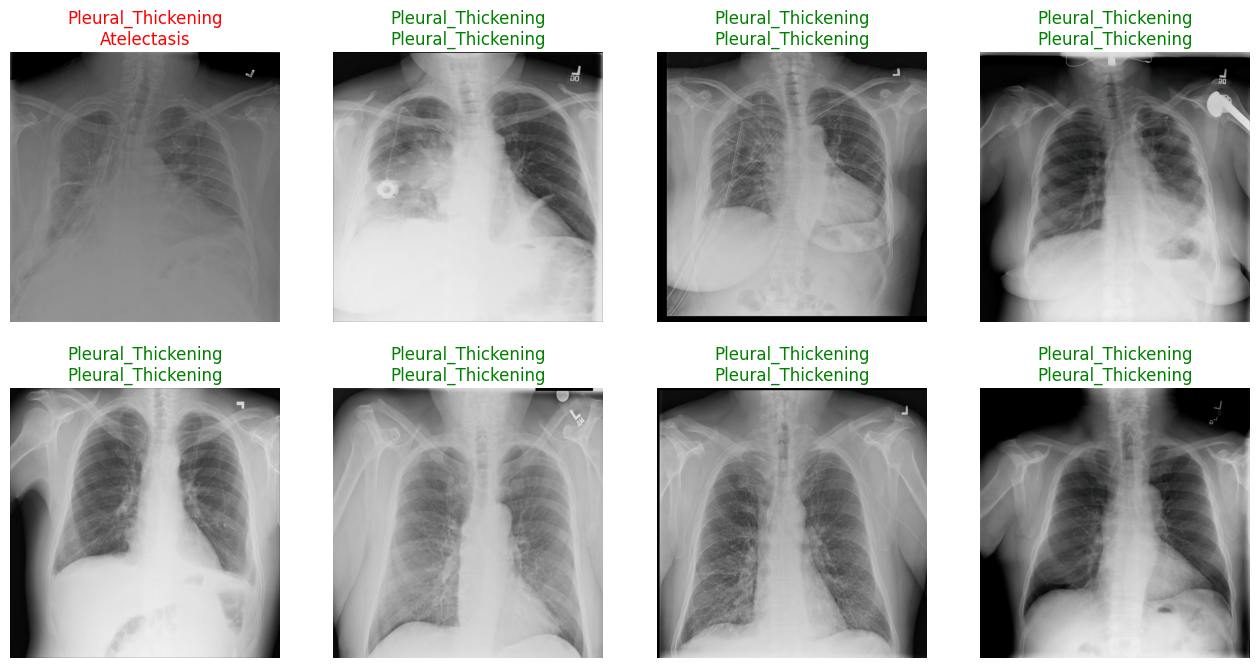

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Escolha o ranking de referência
# models_to_check = rank_transfer        # apenas transfer learning
models_to_check = final_rank.copy()      # transfer + fine-tune

# ============================================================
#   LOOP DE AVALIAÇÃO COM TESTE FILTRADO
# ============================================================

for i, row in models_to_check.iterrows():
    model_name = row["model"]
    phase      = row["phase"]
    ckpt_name  = row["ckpt"]
    arch_fn    = MODEL_REGISTRY[model_name]

    print("\n" + "="*100)
    print(f"🔹 Avaliando modelo: {model_name.upper()} | Fase: {phase} | Checkpoint: {ckpt_name}")
    print("="*100)

    # Carrega o modelo
    learn = get_learner(data, arch_fn, pretrained=True, unfreeze=False)
    learn.load(ckpt_name)

    # ========================================================
    #  TEST SET FILTRADO — usa as MESMAS classes do treino
    # ========================================================
    test_root = PATH_DATASET / "test"

    test_files = [
        f for f in get_image_files(test_root)
        if f.parent.name in ALLOWED_LABELS   # <<<<<<<<<< FILTRO IMPORTANTE
    ]

    assert len(test_files) > 0, "Nenhuma imagem no /test após aplicar o filtro!"

    test_dl = data.test_dl(test_files, with_labels=True)

    # Predições
    preds, targs = learn.get_preds(dl=test_dl)
    y_true = targs.cpu().numpy()
    y_pred = preds.argmax(dim=1).cpu().numpy()

    vocab = list(map(str, (getattr(data, 'vocab', None) or getattr(data.train, 'vocab', []))))

    # --- Métricas ---
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1   = f1_score(y_true, y_pred, average="macro")

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}\n")

    # --- Classification Report ---
    print("📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=vocab, zero_division=0))

    # --- Matriz de Confusão ---
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    im = ax.imshow(cm, interpolation="nearest", cmap="Blues")
    ax.set_title(f"Confusion Matrix — {model_name} ({phase})")

    ax.set_xticks(range(len(vocab))); ax.set_xticklabels(vocab, rotation=45, ha="right")
    ax.set_yticks(range(len(vocab))); ax.set_yticklabels(vocab)

    for (r, c), v in np.ndenumerate(cm):
        ax.text(c, r, str(v), ha="center", va="center", color="black")

    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

    # --- Exemplos visuais ---
    print("🖼️ Exemplos de predição (test filtrado):")
    learn.show_results(dl=test_dl, max_n=8, figsize=(16, 8))
    plt.show()

    # Limpa GPU/memória entre modelos
    del learn
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()


## Grad-CAM para o melhor modelo (um exemplo por classe)

**Grad-CAM** (Gradient-weighted Class Activation Mapping) para gerar mapas de calor que destacam as regiões da imagem mais relevantes para a decisão do modelo.

**Fluxo de Implementação:**
* **Preparação do Modelo:** Carrega o melhor checkpoint e converte os pesos para precisão simples (`FP32`), requisito essencial para a captura estável de gradientes via hooks.
* **Seleção de Camada (`get_target_layer`):** Identifica automaticamente a última camada convolucional do backbone (suporta ResNet, VGG e EfficientNet), onde os mapas de características espaciais são mais ricos.
* **Cálculo de Ativação:** Utiliza *Forward* e *Backward hooks* para capturar os gradientes fluindo para a camada alvo em relação a uma classe específica. 
* **Visualização:** Seleciona um exemplo corretamente classificado de cada classe no conjunto de teste, redimensiona o mapa de calor gerado e o sobrepõe à imagem original para validação qualitativa do foco do modelo.

Carregando modelo salvo: /lapix/compartilhado/asbestos/resnet/resnet34/output_reduzido/models/models/models/resnet34_finetune


/root/anaconda3/envs/lapixdl/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, *

Classes: ['Atelectasis', 'Fibrosis', 'Normal', 'Pleural_Thickening', 'Pneumonia']
Camada alvo: Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Classes presentes: ['Atelectasis', 'Fibrosis', 'Normal', 'Pleural_Thickening', 'Pneumonia']


/root/anaconda3/envs/lapixdl/lib/python3.11/site-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


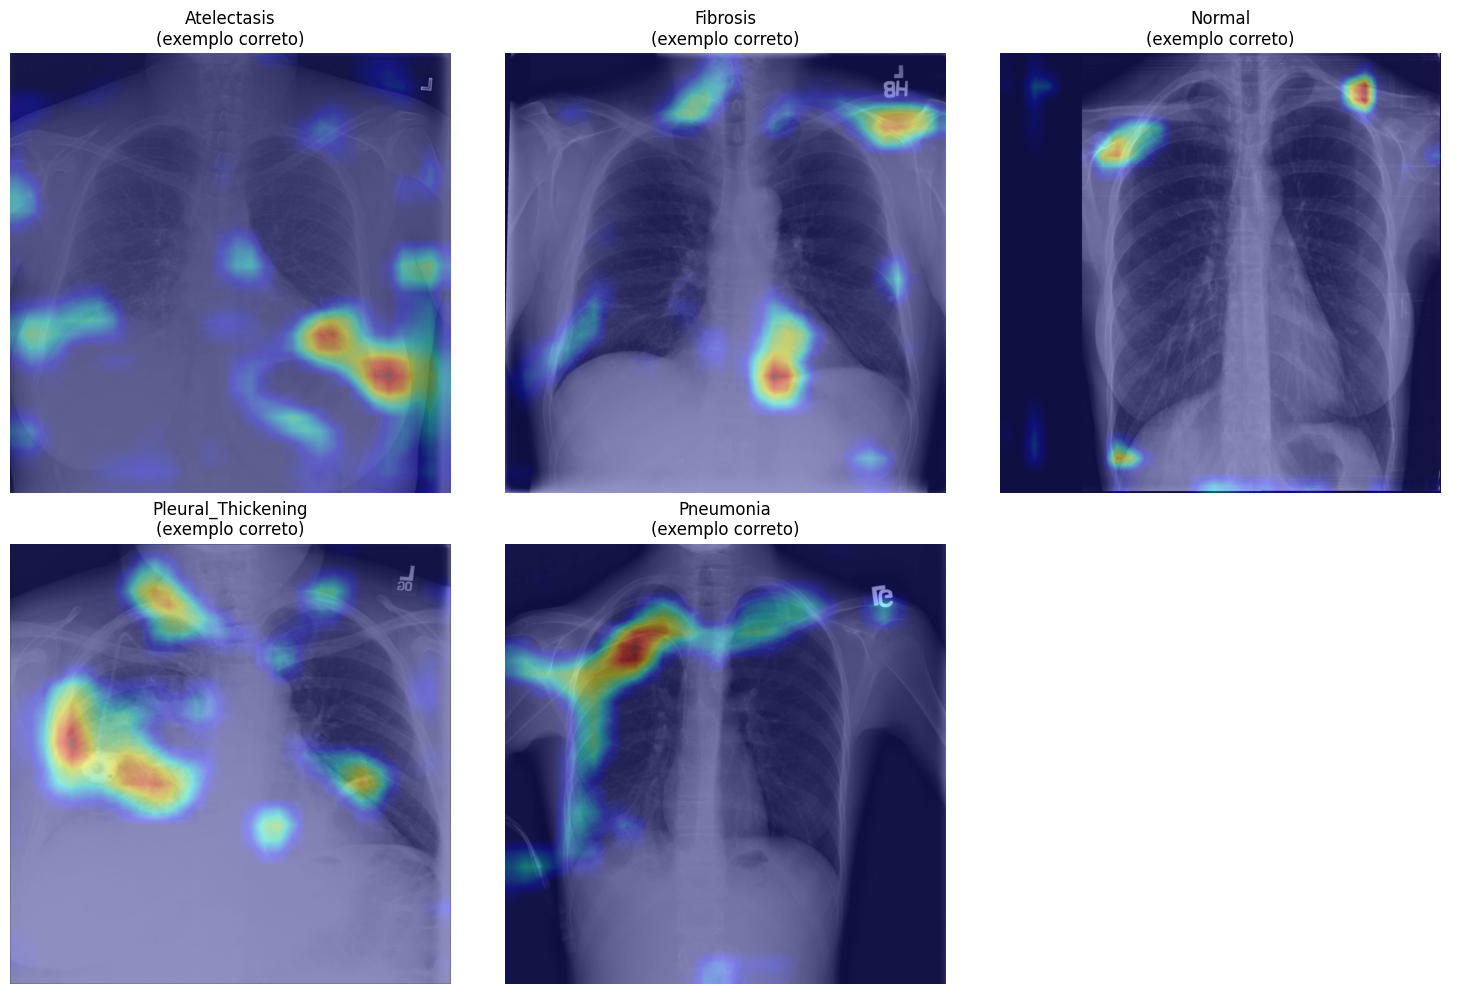

In [26]:
# %%
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.models import (resnet34)
from fastai.vision.all import PILImage, get_image_files

# ----------------------------
# 1) Caminho do modelo salvo
# ----------------------------
CKPT_PATH = "/lapix/compartilhado/asbestos/resnet/resnet34/output_reduzido/models/models/models/resnet34_finetune"

# --- Registro de modelos ---
MODEL_REGISTRY = {
    "resnet34": resnet34,
#    "resnet50": resnet50,
#    "vgg16_bn": vgg16_bn,
#    "efficientnet_b0": efficientnet_b0,
}

MODEL_NAME = "resnet34"   # coloque a ARCH usada no treinamento
BEST_ARCH  = MODEL_REGISTRY[MODEL_NAME]

print(f"Carregando modelo salvo: {CKPT_PATH}")

learn = get_learner(data, BEST_ARCH, pretrained=False, unfreeze=False)
learn.load(CKPT_PATH)
learn.to_fp32()          # MUITO IMPORTANTE para Grad-CAM
learn.model.eval()

# Vocabulário de classes (já filtrado pelo ALLOWED_LABELS)
vocab = list(map(str, (getattr(data, 'vocab', None) or getattr(data.train, 'vocab', []))))
n_classes = len(vocab)
print("Classes:", vocab)

# ----------------------------
# 2) Camada alvo para Grad-CAM
# ----------------------------
def get_target_layer(model: nn.Module) -> nn.Module:
    if isinstance(model, nn.Sequential) and len(model) == 1:
        model = model[0]

    if isinstance(model, torchvision.models.ResNet):
        return model.layer4[-1]

    if isinstance(model, torchvision.models.vgg.VGG):
        for m in reversed(model.features):
            if isinstance(m, nn.Conv2d):
                return m

    if hasattr(torchvision.models, "EfficientNet") and isinstance(model, torchvision.models.EfficientNet):
        return model.features[-1]

    for m in reversed(list(model.modules())):
        if isinstance(m, nn.Conv2d):
            return m

    raise ValueError("Nenhuma camada Conv2d encontrada para Grad-CAM.")

target_layer = get_target_layer(learn.model)
print("Camada alvo:", target_layer)

# ----------------------------
# 3) Função Grad-CAM
# ----------------------------
def compute_gradcam(model: nn.Module, x: torch.Tensor, class_idx: int, target_layer: nn.Module):
    activations = []
    gradients   = []

    def fwd_hook(m, inp, out):
        activations.append(out.detach())

    def bwd_hook(m, grad_in, grad_out):
        gradients.append(grad_out[0].detach())

    h_fwd = target_layer.register_forward_hook(fwd_hook)
    h_bwd = target_layer.register_backward_hook(bwd_hook)

    try:
        model.zero_grad(set_to_none=True)
        logits = model(x)
        score = logits[:, class_idx].sum()
        score.backward()

        acts = activations[0][0]
        grads = gradients[0][0]

        weights = grads.mean(dim=(1, 2))

        cam = torch.zeros_like(acts[0])
        for w, a in zip(weights, acts):
            cam += w * a

        cam = F.relu(cam)
        cam = cam - cam.min()
        cam = cam / (cam.max() + 1e-6)

        return cam.cpu().numpy()

    finally:
        h_fwd.remove()
        h_bwd.remove()

# ----------------------------
# 4) Seleciona exemplo correto por classe no /test
# ----------------------------
test_root = PATH_DATASET / "test"

test_files = [
    f for f in get_image_files(test_root)
    if f.parent.name in ALLOWED_LABELS
]

assert len(test_files) > 0, "Nenhuma imagem após filtrar classes!"

labels_test_presentes = sorted({f.parent.name for f in test_files})
print("Classes presentes:", labels_test_presentes)

test_dl = data.test_dl(test_files, with_labels=True)
preds, targs = learn.get_preds(dl=test_dl)

y_true = targs.cpu().numpy()
y_pred = preds.argmax(dim=1).cpu().numpy()

items = list(test_dl.items)

idxs_por_classe = {}
for cls_idx in range(n_classes):
    idxs = np.where((y_true == cls_idx) & (y_pred == cls_idx))[0]
    if len(idxs) > 0:
        idxs_por_classe[cls_idx] = int(idxs[0])
    else:
        print(f"⚠️ Nenhum acerto para classe '{vocab[cls_idx]}'")

# ----------------------------
# 5) Plot Grad-CAM
# ----------------------------
n_plots = len(idxs_por_classe)
if n_plots == 0:
    print("Nenhum exemplo correto para exibir.")
else:
    n_cols = 3
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    axes = np.array(axes).flatten()

    for ax in axes[n_plots:]:
        ax.axis("off")

    for i, (cls_idx, global_idx) in enumerate(idxs_por_classe.items()):
        ax = axes[i]
        img_path = items[global_idx]

        one_dl = data.test_dl([img_path], with_labels=False)
        batch = one_dl.one_batch()
        xb = batch[0] if isinstance(batch, (list, tuple)) else batch
        xb = xb.to(learn.dls.device)

        cam = compute_gradcam(learn.model, xb, cls_idx, target_layer)

        pil_img = PILImage.create(img_path)
        H, W = xb.shape[-2], xb.shape[-1]
        pil_resized = pil_img.resize((W, H))

        img_np = np.array(pil_resized).astype(np.float32)
        if img_np.ndim == 2:
            img_np = np.stack([img_np]*3, axis=-1)
        img_np = img_np / 255.0

        cam_resized = F.interpolate(
            torch.tensor(cam)[None, None, ...],
            size=(H, W),
            mode="bilinear",
            align_corners=False
        )[0, 0].cpu().numpy()

        ax.imshow(img_np, alpha=0.9)
        ax.imshow(cam_resized, cmap="jet", alpha=0.4)
        ax.set_title(f"{vocab[cls_idx]}\n(exemplo correto)")
        ax.axis("off")

    plt.tight_layout()
    plt.show()
